## Chapter5.2 多クラスのロジスティック回帰

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

データセットの作成

In [2]:
from sklearn.datasets import make_blobs

X_dataset, y_dataset = make_blobs(centers=[[-0.4, 0.6],
                                           [0.5, 0.4],
                                           [-0.1, -0.5]],
                                  cluster_std=0.1,
                                  n_samples=150,
                                  center_box=(-1.0, 1.0),
                                  random_state=42)
dataset = pd.DataFrame(X_dataset, columns=['x0', 'x1'])
dataset['y'] = y_dataset

プロット用関数の定義

In [3]:
def plot_dataset(dataset):
    fig, ax = plt.subplots()
    ax.tick_params(direction='in')
    for key, g in dataset.groupby('y'):
        color = 'k' if key == 2 else 'grey' if key == 1 else 'w'
        g.plot(ax=ax, kind='scatter', x='x0', y='x1',
               label=key, color=color, s=40,
               edgecolor='black', linewidth='1',
               xticks=np.arange(-1, 1, 0.5), yticks=np.arange(-1, 1, 0.5),
               xlim=(-1, 1), ylim=(-1, 1), figsize=(5, 5))
        plt.grid(which='major', color='grey', linestyle='--')
    return fig, ax

データセットをプロット

(<matplotlib.figure.Figure at 0x11581ba10>,
 <matplotlib.axes._subplots.AxesSubplot at 0x11581b750>)

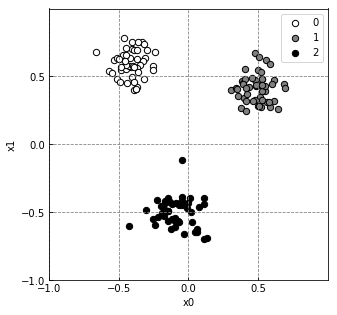

In [4]:
plot_dataset(dataset)

ロジスティック回帰で学習

In [5]:
from sklearn.linear_model import LogisticRegression

# ロジスティック回帰モデルのインスタンスを作成
classifier = LogisticRegression(multi_class='ovr')

# 学習
classifier.fit(X_dataset, y_dataset)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

3クラスの識別境界をプロット

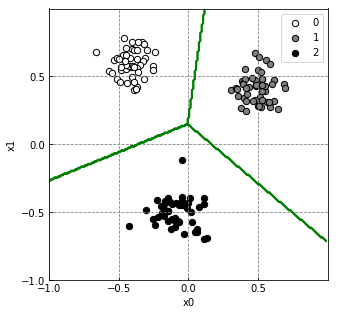

In [6]:
plot_dataset(dataset)

# 0.01刻みのグリッド点を生成する
xx, yy = np.meshgrid(np.arange(-1.0, 1.0, 0.01),
                     np.arange(-1.0, 1.0, 0.01))
# 生成したグリッド点1つ1つを推論をする
Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])

# 描画用に2次元配列に変換
Z = Z.reshape(xx.shape)

# 識別境界を描画
plt.contour(xx, yy, Z, colors='g')

one-vs-rest それぞれの識別境界をプロット

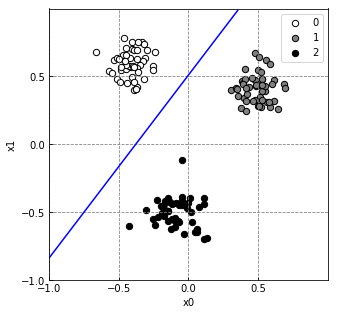

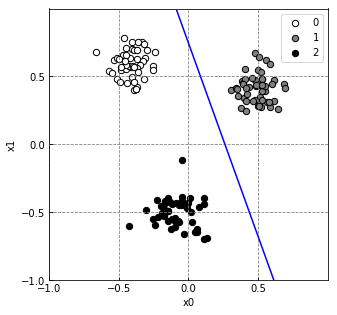

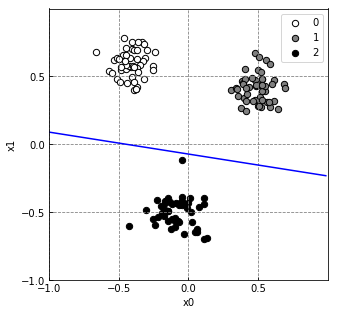

In [7]:
# 0.01刻みのグリッド点を生成する
xx, yy = np.meshgrid(np.arange(-1.0, 1.0, 0.01),
                     np.arange(-1.0, 1.0, 0.01))
# 生成したグリッド点1つ1つを推論をする
Z = classifier.decision_function(np.c_[xx.ravel(), yy.ravel()])

# 識別境界を描画
for c in range(3):
    plot_dataset(dataset)
    # 描画用に2次元配列に変換
    Zc = Z[:, c].reshape(xx.shape)
    plt.contour(xx, yy, Zc, colors='b', levels=[0])
    plt.show()

識別境界からの距離をプロット

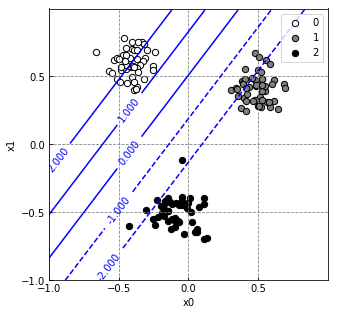

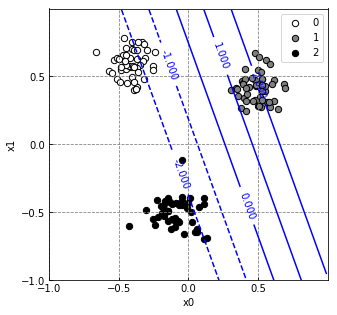

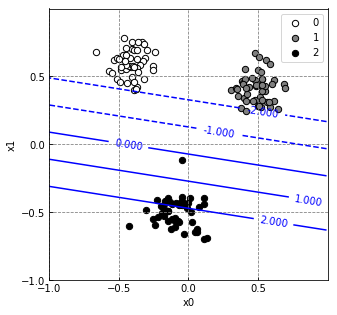

In [8]:
# 0.01刻みのグリッド点を生成する
xx, yy = np.meshgrid(np.arange(-1.0, 1.0, 0.01),
                     np.arange(-1.0, 1.0, 0.01))
# 生成したグリッド点1つ1つを推論をする
Z = classifier.decision_function(np.c_[xx.ravel(), yy.ravel()])


# 識別境界を描画
for c in range(3):
    plot_dataset(dataset)
    # 描画用に2次元配列に変換
    Zc = Z[:, c].reshape(xx.shape)
    cs = plt.contour(xx, yy, Zc, colors='b', levels=[-2, -1, 0, 1, 2])
    plt.clabel(cs, inline=1, fontsize=10)
plt.show()

3つの識別境界を足し合わせてプロット

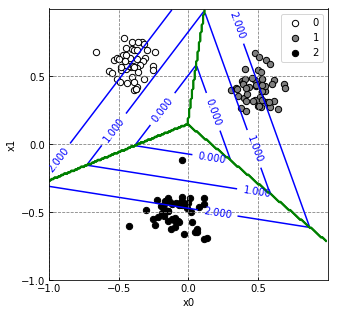

In [9]:
# 0.01刻みのグリッド点を生成する
xx, yy = np.meshgrid(np.arange(-1.0, 1.0, 0.01),
                     np.arange(-1.0, 1.0, 0.01))

# 生成したグリッド点1つ1つを推論をする
Zp = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Zp = Zp.reshape(xx.shape)

Zd = classifier.decision_function(np.c_[xx.ravel(), yy.ravel()])

plot_dataset(dataset)
for c in range(3):
    # cのクラスに該当する点だけを取得
    Zc = np.ma.array(Zd[:, c].reshape(xx.shape), mask=(Zp != c))
    # 識別境界からの距離（等高線）を描画
    cs = plt.contour(xx, yy, Zc, colors='b', levels=[0, 1, 2])
    plt.clabel(cs, inline=1, fontsize=10)

# 3クラスの識別境界を描画
plt.contour(xx, yy, Zp, colors='g')